# PreProcessing Data

Scikit learn requires 
- Numeric data
- No missing values

Real data is messy and needs processing. Categorical features need to be converted to numeric values.  We achieve this by splitting the feature into multiple binary features called dummy variables, one for each category. Zero means the observation was not that category, while one means it was. Say we are working with a music dataset that has a genre feature with ten values such as Electronic, Hip-Hop, and Rock. We create binary features for each genre. As each song has one genre, each row will have a 1 in one of the ten columns and zeros in the rest. If a song is not any of the first nine genres, then implicitly, it is a rock song. That means we only need nine features, so we can delete the Rock column. If we do not do this, we are duplicating information, which might be an issue for some models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
music_df = pd.read_csv('Data/music_original.csv')
music_df = music_df.drop('Unnamed: 0', axis=1)
music_df['genre'] = music_df['genre'].apply(lambda x: x.strip())
print(music_df.shape)
music_df.head()

(1000, 12)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60,0.896000,0.726,214547,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Jazz
1,63,0.003840,0.635,190448,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Rap
2,59,0.000075,0.352,456320,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Electronic
3,54,0.945000,0.488,352280,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Rock
4,55,0.245000,0.667,273693,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Rap


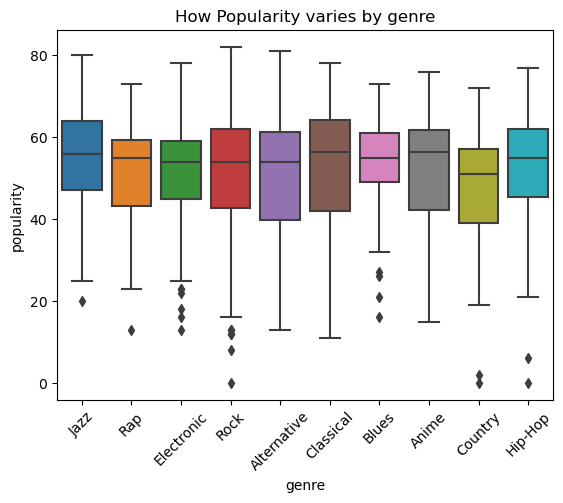

In [3]:
sns.boxplot(data= music_df, x='genre', y='popularity')
plt.title('How Popularity varies by genre')
plt.xticks(rotation = 45)
plt.show()

In [4]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop('genre', axis=1)
music_dummies

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,60,0.896000,0.726,214547,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,0,0,0,0,0,0,1,0,0
1,63,0.003840,0.635,190448,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,0,0,0,0,0,0,0,1,0
2,59,0.000075,0.352,456320,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,0,0,0,0,1,0,0,0,0
3,54,0.945000,0.488,352280,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,0,0,0,0,0,0,0,0,1
4,55,0.245000,0.667,273693,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,0.972000,0.193,208040,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0,0,0,0,0,0,0,0,1
996,56,0.005790,0.939,144453,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0,0,0,0,1,0,0,0,0
997,54,0.016100,0.739,238339,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0,0,0,0,0,0,0,1,0
998,62,0.326000,0.515,286707,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0,0,0,0,0,0,0,0,1


In [5]:
X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

#calculate the training RMSE by taking the square root and converting to positive, 
# achieved by calling numpy-dot-square-root and passing our scores with a minus sign in front.
print(np.sqrt(-linreg_cv))

[12.51382979 13.00836348 11.12788701 12.49699991 13.02163138]


In [6]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.574907518691896
Standard Deviation of the target array: 14.02156909907019


In [7]:
music_df.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

## HANDLING MISSING DATA

In [8]:
music_df = pd.read_csv('Data/music_original.csv')
music_df = music_df.drop('Unnamed: 0', axis=1)
music_df['genre'] = music_df['genre'].apply(lambda x: x.strip())

# Randomly remove data from columns and replace with NaNs
rows_to_remove_popularity = np.random.choice(music_df.index, size=8, replace=False)
rows_to_remove_acousticness = np.random.choice(music_df.index, size=31, replace=False)
rows_to_remove_danceability = np.random.choice(music_df.index, size=44, replace=False)
rows_to_remove_duration_ms = np.random.choice(music_df.index, size=46, replace=False)
rows_to_remove_energy = np.random.choice(music_df.index, size=46, replace=False)
rows_to_remove_instrumentalness = np.random.choice(music_df.index, size=59, replace=False)
rows_to_remove_liveness = np.random.choice(music_df.index, size=91, replace=False)
rows_to_remove_loudness = np.random.choice(music_df.index, size=91, replace=False)
rows_to_remove_speechiness = np.random.choice(music_df.index, size=143, replace=False)
rows_to_remove_tempo = np.random.choice(music_df.index, size=143, replace=False)
rows_to_remove_valence = np.random.choice(music_df.index, size=200, replace=False)
rows_to_remove_genre = np.random.choice(music_df.index, size=200, replace=False)

# Replace selected rows with NaNs
music_df.loc[rows_to_remove_popularity, 'popularity'] = np.nan
music_df.loc[rows_to_remove_acousticness, 'acousticness'] = np.nan
music_df.loc[rows_to_remove_danceability, 'danceability'] = np.nan
music_df.loc[rows_to_remove_duration_ms, 'duration_ms'] = np.nan
music_df.loc[rows_to_remove_energy, 'energy'] = np.nan
music_df.loc[rows_to_remove_instrumentalness, 'instrumentalness'] = np.nan
music_df.loc[rows_to_remove_liveness, 'liveness'] = np.nan
music_df.loc[rows_to_remove_loudness, 'loudness'] = np.nan
music_df.loc[rows_to_remove_speechiness, 'speechiness'] = np.nan
music_df.loc[rows_to_remove_tempo, 'tempo'] = np.nan
music_df.loc[rows_to_remove_valence, 'valence'] = np.nan
music_df.loc[rows_to_remove_genre, 'genre'] = np.nan


# Now, df has NaNs in the positions where data was removed
music = music_df.copy()
print(music.isna().sum().sort_values())

popularity            8
acousticness         31
danceability         44
duration_ms          46
energy               46
instrumentalness     59
liveness             91
loudness             91
speechiness         143
tempo               143
valence             200
genre               200
dtype: int64


#### Drop Missing data

Especially missing observations the account for less than 5% of the data

In [9]:
5/100*1000

50.0

In [10]:
music = music.dropna(subset =['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy'])
print(music.isna().sum().sort_values())

popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness     47
loudness             75
liveness             80
tempo               110
speechiness         116
genre               161
valence             166
dtype: int64


### Impute missing values 

- mean
- median
- For categorical values, use the most frequent value. The mode

Remember to split the data first before imputing to avoid leaking test set information to our model, a concept known as data leakage.data leakage. 

In [11]:
X_cat = music['genre'].values.reshape(-1,1)
X_num = music.drop(['genre','popularity'], axis = 1).values
y = music['popularity'].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)


### Imputing within a pipeline

A pipeline is an object used to run a series of transformations and build a model in a single workflow. 

In [12]:
# perform a binary classification to determine whether a song is rock or other genre.
music = music_df.copy()
music = music.dropna(subset =['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy'])
music['genre'] = np.where(music['genre'] == 'Rock', 1, 0)

X = music.drop('genre', axis=1).values
y = music['genre'].values

steps = [('imputation', SimpleImputer()),
        ('logistic_regression', LogisticRegression())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)


0.5657370517928287

Tidy the music dataset. Create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.
Drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

In [13]:
music = music_df.copy()
music = music.dropna(subset =['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy'])
music['genre'] = np.where(music['genre'] == 'Rock', 1, 0)

print(music.isna().sum().sort_values())
print("Shape of the `music`: {}".format(music.shape))

imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)

steps = [("imputer", imputer), 
         ("knn", knn)]


pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

popularity            0
acousticness          0
danceability          0
duration_ms           0
energy                0
genre                 0
instrumentalness     47
loudness             75
liveness             80
tempo               110
speechiness         116
valence             166
dtype: int64
Shape of the `music`: (835, 12)
[[97 45]
 [69 40]]
